# OOP design for a simple heuristic solver for Frasers Capstone project

Author: Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

Version: v1.0 (10/06/2021)

A simple evolutionary algorithm demo for the Y2021 Capstone Frasers students.

### Imports and requirements

In [1]:
# Core packages
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Custom packages
# - GJK is used to check collisions between polygons (Source: https://github.com/Wopple/GJK)
import gjk

### Playing with building shapes

Defining a Shape superclass and a Rectangular_Shape child class.

In [2]:
# Shape superclass
class Shape():
    
    def __init__(self, x_pos, y_pos, theta = np.pi/2):
        """
        Constructor method for Shape objects.
        """
        
        # Initialize positions
        self._x_pos = x_pos
        self._y_pos = y_pos
        self._theta = theta % (2*np.pi)
        self._corners_list = []
        
        
    def check_intersect(self, other):
        """
        Check for collision between polygons
        """
        return gjk.collidePolyPoly(tuple(self._corners_list), tuple(other._corners_list))
    
    
    """
    Property for x_pos
    """
    def set_x_pos(self, pos):
        self._x_pos = pos
    def get_x_pos(self):
        return self._x_pos
    x_pos = property(get_x_pos, set_x_pos)

    
    """
    Property for y_pos
    """
    def set_y_pos(self, pos):
        self._y_pos = pos
    def get_y_pos(self):
        return self._y_pos
    y_pos = property(get_y_pos, set_y_pos)

    
    """
    Property for theta
    """
    def set_theta(self, theta):
        self._theta = theta
    def get_theta(self):
        return self._theta
    theta = property(get_theta, set_theta)

In [3]:
# Ractangular_Shape child class
class Rectangular_Shape(Shape):
    
    def __init__(self, x_pos, y_pos, length, width, theta = np.pi/2):
        """
        Constructor method for Rectangular_Shape objects.
        """
        
        # Initialize with motherclass
        self._type = "Rectangular"
        super().__init__(x_pos, y_pos, theta)
        
        # Initialize dimensions
        if length < width:
            length, width = width, length
        self._length = length
        self._width = width
        
        # Update corners
        self.update_corners_list()
    
    
    def update_corners_list(self):
        """
        Update method for corners list.
        """
        
        # Diagonal value and arctan value
        d = np.sqrt((self.width/2)**2 + (self.length/2)**2)
        t = np.arctan(self.length/self.width)
        
        # Corner 1
        theta1 = (t + self.theta) % (2*np.pi)
        x1 = round(self.x_pos + d*np.cos(theta1), 5)
        y1 = round(self.y_pos + d*np.sin(theta1), 5)

        # Corner 2
        theta2 = (-t + self.theta) % (2*np.pi)
        x2 = round(self.x_pos + d*np.cos(theta2), 5)
        y2 = round(self.y_pos + d*np.sin(theta2), 5)

        # Corner 3
        theta3 = (t + self.theta - np.pi) % (2*np.pi)
        x3 = round(self.x_pos + d*np.cos(theta3), 5)
        y3 = round(self.y_pos + d*np.sin(theta3), 5)

        # Corner 4
        theta4 = (-t + self.theta - np.pi) % (2*np.pi)
        x4 = round(self.x_pos + d*np.cos(theta4), 5)
        y4 = round(self.y_pos + d*np.sin(theta4), 5)

        # Assemble
        self._corners_list = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
        
        
    """
    Property for length
    """
    def set_length(self, length):
        self._length = length
    def get_length(self):
        return self._length
    length = property(get_length, set_length)

    
    """
    Property for width
    """
    def set_width(self, width):
        self._width = width
    def get_width(self):
        return self._width
    width = property(get_width, set_width)

In [4]:
# Check the collision happens
b1 = Rectangular_Shape(0, 0, 20, 10, np.pi/2)
print(b1.__dict__)
b2 = Rectangular_Shape(0, 0, 20, 10, 0)
print(b2.__dict__)
print(b1.check_intersect(b2))

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-10.0, 5.0), (10.0, 5.0), (10.0, -5.0), (-10.0, -5.0)], '_length': 20, '_width': 10}
{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 0.0, '_corners_list': [(5.0, 10.0), (5.0, -10.0), (-5.0, -10.0), (-5.0, 10.0)], '_length': 20, '_width': 10}
True


In [5]:
# Check for no collision
b1 = Rectangular_Shape(0, 0, 20, 10, np.pi/2)
print(b1.__dict__)
b2 = Rectangular_Shape(20, 50, 20, 10, 0)
print(b2.__dict__)
print(b1.check_intersect(b2))

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-10.0, 5.0), (10.0, 5.0), (10.0, -5.0), (-10.0, -5.0)], '_length': 20, '_width': 10}
{'_type': 'Rectangular', '_x_pos': 20, '_y_pos': 50, '_theta': 0.0, '_corners_list': [(25.0, 60.0), (25.0, 40.0), (15.0, 40.0), (15.0, 60.0)], '_length': 20, '_width': 10}
False


### 

### Defining the Rectangular Environment class (only acceptable one for now)

In [6]:
# Rectangular environment class, as a Rectangular_Shape sublass
class Rectangular_Environment(Rectangular_Shape):
    
    def __init__(self, x_pos, y_pos, length, width):
        """
        Constructor method for Rectangular_Environment objects.
        """
        
        # Initialize Environment as Rectangular
        super().__init__(x_pos, y_pos, length, width)
        
        # Define list of buildings as empty for now
        self.buildings_list = []
        
        # Define solver and performance criterion for current environment, set as None for now
        self.solver = None
        self.valid = False
        self.perf = None
        
        
    def add_building(self, building):
        """
        Add building method (no remove building method yet)
        """
        
        self.buildings_list.append(building)
        
    def add_solver(self, solver):
        """
        Add solver to environment (after environment has been initialized).
        """
        
        self.solver = solver
    
    
    def run_solver(self):
        """
        Run solver and get suggested design
        """
        
        self.valid, self.perf, self.buildings_list = self.solver.run()
        print("Final: ", [(b.x_pos, b.y_pos) for b in self.buildings_list])
        
    def display_environment(self):
        # Initialize figure
        plt.figure()

        # Display environment (blue)
        coords_env = self._corners_list + [self._corners_list[0]]
        env_x_coords = [coord[0] for coord in coords_env]
        env_y_coords = [coord[1] for coord in coords_env]
        plt.plot(env_x_coords, env_y_coords)

        # Display buildings (in red)
        for index, b in enumerate(self.buildings_list):
            coords_b = b._corners_list + [b._corners_list[0]]
            b_x_coords = [coord[0] for coord in coords_b]
            b_y_coords = [coord[1] for coord in coords_b]
            plt.plot(b_x_coords, b_y_coords, color = "red")
        
        # Display
        #plt.show()

In [7]:
e = Rectangular_Environment(0, 0, 100, 50)
b1 = Rectangular_Shape(-39, -19, 20, 10, np.pi/2)
e.add_building(b1)
b2 = Rectangular_Shape(-34, 9, 30, 10, 0)
e.add_building(b2)
b3 = Rectangular_Shape(25, 11, 25, 15, 0)
e.add_building(b3)
print(e.__dict__)

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], '_length': 100, '_width': 50, 'buildings_list': [<__main__.Rectangular_Shape object at 0x0000022C165ECD90>, <__main__.Rectangular_Shape object at 0x0000022C165ECB50>, <__main__.Rectangular_Shape object at 0x0000022C7E307940>], 'solver': None, 'valid': False, 'perf': None}


### A first solver: random movements of centers for rectangles

This first solver attempts to move buildings in the rectangular environment (keeping them in!), and brings them closer together. The objective is to minimize the distance between the centroids of the buildings (sum over all the possible pairs of buildings).

It will do so by moving the buildings centroids randomly in space (our mutation process to create a new candidate), and will only accept a new candidate if and only if it satisfies two conditions:
- the buildings are still in the rectangular environment (constraint satisfied),
- the buildings are closer together than the previous design (improvement on objective/performance function).

In [8]:
# Solver superclass
class Solver():
    
    def __init__(self, environment, solver_name = "Solver"):
        """
        Constructor method for Solver objects.
        """
        
        # Just a solver name attribute for now
        self.solver_name = solver_name

In [9]:
# Random_Movement_Solver child class
class Random_Movement_Solver(Solver):
    
    def __init__(self, environment, iterations = 1000):
        """
        Constructor method for Random_Movement_Solver objects.
        """
        
        # Reuse superclass
        super().__init__(environment, solver_name = "Random Movement Solver")
        
        # Initialize number of iterations
        self.iterations = iterations
        
        # Retrieve buildings list
        self.buildings_list = deepcopy(environment.buildings_list)
        
        # Retrieve environment shape
        self.environment_shape = deepcopy(environment._corners_list)
        
        # Retrieve environment size for mutation scheduler in mutate_building()
        # and random_step() methods
        # NOTE: Will only work with Rectangular_Shape environments.
        self.environment_size = environment.length
        
        # Initialize performance and validity criterions
        self.valid = self.check_validity(buildings_list = self.buildings_list)
        if self.valid:
            self.perf = self.perf_criterion(buildings_list = self.buildings_list)
        else:
            self.perf = np.inf
        
    
    def check_for_collisions_buildings(self, buildings_list):
        """
        Check for collisions between buildings in buildings_list.
        """
        
        # Compute number of buildings
        buildings_number = len(buildings_list)
        
        # Check for collision between all pairs of buildings
        for b1_index in range(buildings_number):
            b1 = buildings_list[b1_index]
            for b2_index in range(b1_index + 1, buildings_number):
                b2 = buildings_list[b2_index]
                intersect = b1.check_intersect(b2)
                if intersect:
                    return True
        return False
    
    
    def check_for_collisions_env(self, buildings_list):
        """
        Check for collisions between buildings in buildings_list and environment.
        NOTE: Will only work with Rectangular_Shape environments.
        """
        
        # Find env_min_x, env_max_x, env_min_y, env_max_y
        if not all([hasattr(self, "env_min_x"), hasattr(self, "env_max_x"), \
                    hasattr(self, "env_min_y"), hasattr(self, "env_max_y")]):
            self.env_min_x = min([coord[0] for coord in self.environment_shape])
            self.env_max_x = max([coord[0] for coord in self.environment_shape])
            self.env_min_y = min([coord[1] for coord in self.environment_shape])
            self.env_max_y = max([coord[1] for coord in self.environment_shape])
        
        for b in buildings_list:
            for coord in b._corners_list:
                x, y = coord
                if any([x < self.env_min_x, x > self.env_max_x, y < self.env_min_y, y > self.env_max_y]):
                    return True
        return False
        
        
    def check_validity(self, buildings_list):
        """
        Check for validity of current layout in buildings_list.
        NOTE: Will only work with Rectangular_Shape environments.
        """
        
        check1 = not self.check_for_collisions_buildings(buildings_list = buildings_list)
        check2 = not self.check_for_collisions_env(buildings_list = buildings_list)
        return check1 and check2
    
    
    def mutate_building(self, b, iter_num):
        """
        Mutate building by moving its centroid randomly in space
        It choose direction and step randomly with uniform distribution.
        """
        
        # Random angle
        random_angle = 2*np.pi*np.random.random()
        
        # Random step value (follows a scheduler based on iterations)
        random_step = self.random_step(iter_num)
        
        # Adjust centroid coordinates for building
        b.x_pos = b.x_pos + random_step*np.cos(random_angle)
        b.y_pos = b.y_pos + random_step*np.sin(random_angle)
        
        # Update corners list
        b.update_corners_list()
        
        return b
        
    
    def random_step(self, iter_num):
        """
        Random step calculator for mutation, includes simple decay.
        """
        
        # Define max stepdecay_rate
        decay_rate = int(self.iterations/5)
        power = iter_num // decay_rate
        max_step = self.environment_size/(2**power)
        random_step = max_step*np.random.random()
        return random_step
    
    
    def perf_criterion(self, buildings_list):
        """
        Performance criterion will be the sum of distances between the centroids of the three buildings.
        
        NOTE: this only works with three buildings in the environment,
        to be replaced with general formula for area of polygons?
        Or another performance criterion.
        """
        
        A = np.array((buildings_list[0].x_pos, buildings_list[0].y_pos))
        B = np.array((buildings_list[1].x_pos, buildings_list[1].y_pos))
        C = np.array((buildings_list[2].x_pos, buildings_list[2].y_pos))
        a = np.linalg.norm(A - B)
        b = np.linalg.norm(B - C)
        c = np.linalg.norm(A - C)
        
        # Previous version was using Heron's formula
        #s = (a+b+c)/2
        #val = np.sqrt(s*(s-a)*(s-b)*(s-c)) # Unstable formula
        #l = [a,b,c]
        #l.sort()
        #a, b, c = l[0], l[1], l[2]
        #val = 1/4*np.sqrt((a+b+c)*(c-a+b)*(c+a-b)*(a+b-c)) # v2, still unstable
        
        val = a + b + c
        return val
    
        
    def run(self):
        """
        Run the solver by performing iterations until the maximal number of iterations is reached.
        NOTE: The current solver design:
        - will mutate all buildings if no valid design has been found yet,
        - will mutate only one building at a time if a valid design has been found,
        - will mutate building by moving their centroid, but not rotate them,
        - will accept a mutation as the new best candidate if it is a valid design (in terms and constraints)
        and it performs better than the previous best candidate in terms of objective/performance function.
        """
        
        for iter_num in range(self.iterations):
            
            # Display
            print("---")
            print("Iteration: ", iter_num)
            print("Current coords: ", [(b.x_pos, b.y_pos) for b in self.buildings_list])
            print("Current validity: ", self.valid)
            print("Current perf: ", self.perf)
            
            # Mutate (all buildings if invalid design is current candidate,
            # only one building otherwise)
            buildings_list_new = deepcopy(self.buildings_list)
            if not self.valid:
                for b in buildings_list_new:
                    b = self.mutate_building(b, iter_num)
            else:
                b = np.random.choice(buildings_list_new)
                b = self.mutate_building(b, iter_num)
                
            # Display
            print("Proposed mutation: ", [(b.x_pos, b.y_pos) for b in buildings_list_new])
            
            # Check for validity and compute perf criterion if needed.
            # Update best candidate if improvement
            new_valid = self.check_validity(buildings_list = buildings_list_new)
            if not new_valid:
                print("New design is invalid.")
                continue
            elif not self.valid:
                self.buildings_list = buildings_list_new
                new_perf = self.perf_criterion(self.buildings_list)
                self.perf = new_perf
                print("Accepted mutation, first valid design.")
            else:
                new_perf = self.perf_criterion(buildings_list_new)
                if new_perf < self.perf:
                    self.perf = new_perf
                    self.buildings_list = buildings_list_new
                    print("Accepted mutation, found a better valid design.")
                else:
                    print("Rejected mutation, proposed design was valid but not better.")
                    
            
        return self.valid, self.perf, self.buildings_list

In [10]:
rms = Random_Movement_Solver(e)
print(rms.__dict__)

{'solver_name': 'Random Movement Solver', 'iterations': 1000, 'buildings_list': [<__main__.Rectangular_Shape object at 0x0000022C166427F0>, <__main__.Rectangular_Shape object at 0x0000022C166427C0>, <__main__.Rectangular_Shape object at 0x0000022C166428E0>], 'environment_shape': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], 'environment_size': 100, 'env_min_x': -50.0, 'env_max_x': 50.0, 'env_min_y': -25.0, 'env_max_y': 25.0, 'valid': True, 'perf': 158.15920206752673}


In [11]:
rms.run()

---
Iteration:  0
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-34, 9), (78.8384564251786, -32.6703701390111)]
New design is invalid.
---
Iteration:  1
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-34, 9), (98.29056055901508, -16.70770513686787)]
New design is invalid.
---
Iteration:  2
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-33.436787467287054, -65.23080521982713), (25, 11)]
New design is invalid.
---
Iteration:  3
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-56.06812783679277, -17.262986753219174), (-34, 9), (25, 11)]
New design is invalid.
---
Iteration:  4
Current coords:  [(-39, -19), (-34, 9), (25, 11)]


Current validity:  True
Current perf:  152.02321661045323
Proposed mutation:  [(-79.03230052169025, 35.79850944200987), (-34, 9), (25, 11)]
New design is invalid.
---
Iteration:  48
Current coords:  [(-35.69472758835302, -17.0650417643413), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  152.02321661045323
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-34, 9), (89.5172735526608, 36.853781384561444)]
New design is invalid.
---
Iteration:  49
Current coords:  [(-35.69472758835302, -17.0650417643413), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  152.02321661045323
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-45.972786459104476, 0.663262833277809), (25, 11)]
New design is invalid.
---
Iteration:  50
Current coords:  [(-35.69472758835302, -17.0650417643413), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  152.02321661045323
Proposed mutation:  [(-40.27601977881205, -12.682516013903353), (-34, 9), (25, 11)]
New design is

Iteration:  86
Current coords:  [(-35.69472758835302, -17.0650417643413), (-6.454747601125273, -4.434554712944529), (-34.55434967797245, 5.446687601008554)]
Current validity:  True
Current perf:  84.1782489896148
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (58.96306174558232, 42.65014245589296), (-34.55434967797245, 5.446687601008554)]
New design is invalid.
---
Iteration:  87
Current coords:  [(-35.69472758835302, -17.0650417643413), (-6.454747601125273, -4.434554712944529), (-34.55434967797245, 5.446687601008554)]
Current validity:  True
Current perf:  84.1782489896148
Proposed mutation:  [(-48.55256053826119, -20.835947979801876), (-6.454747601125273, -4.434554712944529), (-34.55434967797245, 5.446687601008554)]
New design is invalid.
---
Iteration:  88
Current coords:  [(-35.69472758835302, -17.0650417643413), (-6.454747601125273, -4.434554712944529), (-34.55434967797245, 5.446687601008554)]
Current validity:  True
Current perf:  84.1782489896148
Proposed mutation

Rejected mutation, proposed design was valid but not better.
---
Iteration:  137
Current coords:  [(-35.69472758835302, -17.0650417643413), (-6.576674547228644, -2.7836948950575864), (-34.55434967797245, 5.446687601008554)]
Current validity:  True
Current perf:  84.13548998292437
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-6.576674547228644, -2.7836948950575864), (-35.80017553624857, 1.1402729698707823)]
Accepted mutation, found a better valid design.
---
Iteration:  138
Current coords:  [(-35.69472758835302, -17.0650417643413), (-6.576674547228644, -2.7836948950575864), (-35.80017553624857, 1.1402729698707823)]
Current validity:  True
Current perf:  80.12313032337548
Proposed mutation:  [(6.8305222077229, 65.814676435653), (-6.576674547228644, -2.7836948950575864), (-35.80017553624857, 1.1402729698707823)]
New design is invalid.
---
Iteration:  139
Current coords:  [(-35.69472758835302, -17.0650417643413), (-6.576674547228644, -2.7836948950575864), (-35.80017553624

Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
Current validity:  True
Current perf:  54.4815433332373
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-5.647999481217049, -21.69764525174201), (-35.093402553050794, 1.5371103437195244)]
New design is invalid.
---
Iteration:  206
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
Current validity:  True
Current perf:  54.4815433332373
Proposed mutation:  [(-44.326982493953224, -9.864240617326523), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
New design is invalid.
---
Iteration:  207
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
Current validity:  True
Current perf:  54.4815433332373
Proposed mutation:

Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
Current validity:  True
Current perf:  54.4815433332373
Proposed mutation:  [(-72.16093374048639, -10.622520247756118), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
New design is invalid.
---
Iteration:  242
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
Current validity:  True
Current perf:  54.4815433332373
Proposed mutation:  [(-10.643302273938158, -12.677929558483008), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
New design is invalid.
---
Iteration:  243
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-35.093402553050794, 1.5371103437195244)]
Current validity:  True
Current perf:  54.4815433332373
Proposed mutati

Current validity:  True
Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-13.739191175070786, -5.723253384567208), (-36.53880180070265, 0.6148415441145947)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  290
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (19.887120099836494, -35.24029118271159), (-36.53880180070265, 0.6148415441145947)]
New design is invalid.
---
Iteration:  291
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-42.31598625219729

Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-43.041865644109706, 12.366684347900819)]
New design is invalid.
---
Iteration:  353
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-26.738829600104086, 3.757013205535511)]
New design is invalid.
---
Iteration:  354
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-60.023578717231445, -32.08631380581228), (-36.53880180070265, 0.6148415441145947)]
New design is invalid.
---
Iteration: 

New design is invalid.
---
Iteration:  391
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-60.01685888970324, -28.21738285847953)]
New design is invalid.
---
Iteration:  392
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  54.455742630566135
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-33.09782276132834, 14.275706077908016)]
New design is invalid.
---
Iteration:  393
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.07778627322765, -6.706776584232157), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current pe

New design is invalid.
---
Iteration:  440
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.55837986833465, -5.945884604194384), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  53.75626978958395
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-16.777284466656706, 18.722328485675707), (-36.53880180070265, 0.6148415441145947)]
New design is invalid.
---
Iteration:  441
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.55837986833465, -5.945884604194384), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current perf:  53.75626978958395
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-20.55837986833465, -5.945884604194384), (-36.015822836664995, -11.400819017386473)]
New design is invalid.
---
Iteration:  442
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.55837986833465, -5.945884604194384), (-36.53880180070265, 0.6148415441145947)]
Current validity:  True
Current p

Current perf:  53.40025515949749
Proposed mutation:  [(-38.01046264531559, 0.41459351532602895), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
New design is invalid.
---
Iteration:  503
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
Current validity:  True
Current perf:  53.40025515949749
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-18.022254580964287, 17.081038832344394), (-35.377017770740984, 1.129726470614977)]
New design is invalid.
---
Iteration:  504
Current coords:  [(-35.69472758835302, -17.0650417643413), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
Current validity:  True
Current perf:  53.40025515949749
Proposed mutation:  [(-35.69472758835302, -17.0650417643413), (-20.55837986833465, -5.945884604194384), (-34.903266426056355, -2.2143922616470273)]
New design is invalid.
---
Iteration: 

Iteration:  538
Current coords:  [(-35.721321117878205, -16.372530097569125), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
Current validity:  True
Current perf:  52.32875234140227
Proposed mutation:  [(-32.410876039673084, -10.789330476993555), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
New design is invalid.
---
Iteration:  539
Current coords:  [(-35.721321117878205, -16.372530097569125), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
Current validity:  True
Current perf:  52.32875234140227
Proposed mutation:  [(-46.74536195918516, -22.90780122632523), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
New design is invalid.
---
Iteration:  540
Current coords:  [(-35.721321117878205, -16.372530097569125), (-20.55837986833465, -5.945884604194384), (-35.377017770740984, 1.129726470614977)]
Current validity:  True
Current perf:  52.32875234

Iteration:  587
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.55837986833465, -5.945884604194384), (-34.36783186014473, 1.5066666027949966)]
Current validity:  True
Current perf:  51.96409554906625
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.55837986833465, -5.945884604194384), (-33.941036141458525, 1.205585960901612)]
Accepted mutation, found a better valid design.
---
Iteration:  588
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.55837986833465, -5.945884604194384), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.18119461058576
Proposed mutation:  [(-22.46199037691174, -22.44668133302208), (-20.55837986833465, -5.945884604194384), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  589
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.55837986833465, -5.945884604194384), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Curre

Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-19.14815522369541, -10.12799000241666), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  649
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-41.56453053734879, -8.148544092623071), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  650
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-29.252801341593674, -8.84600180054548), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iter

Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.360221559066428, -15.594932338960788), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  682
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-38.96718460475598, -5.098272153168593)]
New design is invalid.
---
Iteration:  683
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-10.943668693742577, 1.0344835065320312), (-33.941036141458525, 1.205585960901612)]
Rejected mutation, proposed design was valid but not better.

Current perf:  51.05646655649951
Proposed mutation:  [(-34.0481131317779, -15.91061267342689), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  729
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-34.997168091841516, -14.773475728098116), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  730
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-30.3831503612251, -19.457007366041633), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Ite

Current perf:  51.05646655649951
Proposed mutation:  [(-37.24584064551547, -12.008906662303609), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  789
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-34.91814503198252, -18.714517680628184), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  790
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.291841736171286, 2.3251888569493735)]
Rejected mutation, proposed

New design is invalid.
---
Iteration:  824
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.14489126091623, -15.25587434077739), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  825
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-37.23140466869488, 0.6783373565947954)]
New design is invalid.
---
Iteration:  826
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  Tru

Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-21.06617634093908, -3.984024473346888), (-33.941036141458525, 1.205585960901612)]
New design is invalid.
---
Iteration:  874
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-36.73556435156995, 0.7289614185329406)]
New design is invalid.
---
Iteration:  875
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
Current validity:  True
Current perf:  51.05646655649951
Proposed mutation:  [(-39.17366449706485, -21.285569270104883), (-20.631280576673074, -5.951770730608502), (-33.941036141458525, 1.205585960901612)]
New d

Current validity:  True
Current perf:  50.73076499807215
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.879888099741457, -5.649232434727709), (-33.6164000145661, 1.1549338517661902)]
New design is invalid.
---
Iteration:  931
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.6164000145661, 1.1549338517661902)]
Current validity:  True
Current perf:  50.73076499807215
Proposed mutation:  [(-35.099725023181634, -16.474434317073612), (-20.631280576673074, -5.951770730608502), (-33.6164000145661, 1.1549338517661902)]
New design is invalid.
---
Iteration:  932
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.6164000145661, 1.1549338517661902)]
Current validity:  True
Current perf:  50.73076499807215
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-35.24024787722144, 1.338715191664801)]
Rejected

Iteration:  968
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.6164000145661, 1.1549338517661902)]
Current validity:  True
Current perf:  50.73076499807215
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-38.11861811285236, 4.8639575975180005)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  969
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.6164000145661, 1.1549338517661902)]
Current validity:  True
Current perf:  50.73076499807215
Proposed mutation:  [(-35.63773758642724, -16.381907939613573), (-20.09496008301287, -7.066335577357384), (-33.6164000145661, 1.1549338517661902)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  970
Current coords:  [(-35.63773758642724, -16.381907939613573), (-20.631280576673074, -5.951770730608502), (-33.6164000145661

(True,
 50.73076499807215,
  <__main__.Rectangular_Shape at 0x22c16676be0>])

### Testing our solver on rectangular environment

In [12]:
# Initialize environment
e = Rectangular_Environment(0, 0, 100, 50)

# Add buildings
b1 = Rectangular_Shape(-35, -17, 20, 10, np.pi/2)
e.add_building(b1)
b2 = Rectangular_Shape(0, 5, 30, 10, 0)
e.add_building(b2)
b3 = Rectangular_Shape(21, 7, 25, 15, np.pi/4)
e.add_building(b3)

# Add solver
rms = Random_Movement_Solver(e, iterations = 10000)
e.add_solver(rms)

# Display
print(e.__dict__)

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], '_length': 100, '_width': 50, 'buildings_list': [<__main__.Rectangular_Shape object at 0x0000022C16671220>, <__main__.Rectangular_Shape object at 0x0000022C165ECD90>, <__main__.Rectangular_Shape object at 0x0000022C165ECB50>], 'solver': <__main__.Random_Movement_Solver object at 0x0000022C7E307940>, 'valid': False, 'perf': None}


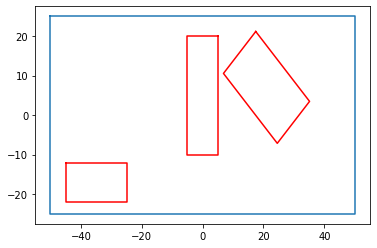

In [13]:
# Display (initial)
e.display_environment()

In [14]:
# Run solver (this take a long time, 100000 iterations!)
e.run_solver()

---
Iteration:  0
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(15.497122193623959, -80.68590699206264), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  1
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (-87.97792794825743, 32.15938911136092), (21, 7)]
New design is invalid.
---
Iteration:  2
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(20.125967451526066, 41.77144631719631), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  3
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (0, 5), (34.23403823654429, -55.670323231261264)]
New design is invalid.
---
Iteration:  4
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Cu

Proposed mutation:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (87.93610389041145, -0.37898051964928126)]
New design is invalid.
---
Iteration:  146
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (21, 7)]
Current validity:  True
Current perf:  93.85184279620591
Proposed mutation:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (-35.83040089125415, 2.5116928298404844)]
New design is invalid.
---
Iteration:  147
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (21, 7)]
Current validity:  True
Current perf:  93.85184279620591
Proposed mutation:  [(-94.23249121786009, -8.822513885998234), (-7.431092406341635, -0.42844631840559355), (21, 7)]
New design is invalid.
---
Iteration:  148
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (21, 7)

Current perf:  93.85184279620591
Proposed mutation:  [(-29.39690258411973, 9.514475501171582), (-7.431092406341635, -0.42844631840559355), (21, 7)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  189
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (21, 7)]
Current validity:  True
Current perf:  93.85184279620591
Proposed mutation:  [(-8.011137698003896, 88.85014620297684), (-7.431092406341635, -0.42844631840559355), (21, 7)]
New design is invalid.
---
Iteration:  190
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (21, 7)]
Current validity:  True
Current perf:  93.85184279620591
Proposed mutation:  [(-25.208079006366965, 0.4761962558060979), (-4.391725241012144, -61.348945433066085), (21, 7)]
New design is invalid.
---
Iteration:  191
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-7.431092406341635, -0.42844631840559355), (21, 7)

Proposed mutation:  [(-81.4159088720001, -13.42136936361392), (-9.579897638018043, 3.8286373186642573), (16.56814638689015, 8.449223628571275)]
New design is invalid.
---
Iteration:  308
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-9.579897638018043, 3.8286373186642573), (16.56814638689015, 8.449223628571275)]
Current validity:  True
Current perf:  85.0671125601996
Proposed mutation:  [(-47.31187931314688, 65.0954872697068), (-9.579897638018043, 3.8286373186642573), (16.56814638689015, 8.449223628571275)]
New design is invalid.
---
Iteration:  309
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-9.579897638018043, 3.8286373186642573), (16.56814638689015, 8.449223628571275)]
Current validity:  True
Current perf:  85.0671125601996
Proposed mutation:  [(-25.208079006366965, 0.4761962558060979), (57.6582808804406, 60.768633003039376), (16.56814638689015, 8.449223628571275)]
New design is invalid.
---
Iteration:  310
Current coords:  [(-25.208079006366965, 0.

Iteration:  342
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-9.579897638018043, 3.8286373186642573), (16.56814638689015, 8.449223628571275)]
Current validity:  True
Current perf:  85.0671125601996
Proposed mutation:  [(-25.208079006366965, 0.4761962558060979), (-9.579897638018043, 3.8286373186642573), (-26.10863284630826, 58.592064982889)]
New design is invalid.
---
Iteration:  343
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-9.579897638018043, 3.8286373186642573), (16.56814638689015, 8.449223628571275)]
Current validity:  True
Current perf:  85.0671125601996
Proposed mutation:  [(-25.208079006366965, 0.4761962558060979), (-9.579897638018043, 3.8286373186642573), (-21.628214228965376, 10.99740201354708)]
New design is invalid.
---
Iteration:  344
Current coords:  [(-25.208079006366965, 0.4761962558060979), (-9.579897638018043, 3.8286373186642573), (16.56814638689015, 8.449223628571275)]
Current validity:  True
Current perf:  85.0671125601996
Proposed

Current perf:  75.38756152907568
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (-5.565339087940444, 29.67127595504487)]
New design is invalid.
---
Iteration:  453
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
Current validity:  True
Current perf:  75.38756152907568
Proposed mutation:  [(45.13376912871805, -16.17514459500703), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
New design is invalid.
---
Iteration:  454
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
Current validity:  True
Current perf:  75.38756152907568
Proposed mutation:  [(-20.70696164914679, -32.83373769146679), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
New design is invalid.
---
Iteration:  455
Cu

Current validity:  True
Current perf:  75.38756152907568
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (37.5862035536542, -22.903761424919004)]
New design is invalid.
---
Iteration:  490
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
Current validity:  True
Current perf:  75.38756152907568
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (48.66113160546848, 79.44944352095537)]
New design is invalid.
---
Iteration:  491
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
Current validity:  True
Current perf:  75.38756152907568
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-9.582531734132393, 5.114190382383183), (10.44769737511631, -4.0426143970507695)]
Rejected mutation, pro

Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-31.1582511188871, 8.697382205614957), (10.44769737511631, -4.0426143970507695)]
New design is invalid.
---
Iteration:  600
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
Current validity:  True
Current perf:  75.38756152907568
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (-28.33911775849703, 41.32106563408207)]
New design is invalid.
---
Iteration:  601
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
Current validity:  True
Current perf:  75.38756152907568
Proposed mutation:  [(-81.95122421530486, -7.0137558461814455), (-9.483649520010387, 4.398770708388865), (10.44769737511631, -4.0426143970507695)]
New design is invalid.
---
Iteration:  602
Current coords:  [(-25.36968898363

Current perf:  75.2822046049842
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-42.36151509706734, 22.359177929631144), (10.112477862729154, -4.7638729361248515)]
New design is invalid.
---
Iteration:  637
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.112477862729154, -4.7638729361248515)]
Current validity:  True
Current perf:  75.2822046049842
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-5.211268023210545, 56.18198652049739), (10.112477862729154, -4.7638729361248515)]
New design is invalid.
---
Iteration:  638
Current coords:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (10.112477862729154, -4.7638729361248515)]
Current validity:  True
Current perf:  75.2822046049842
Proposed mutation:  [(-25.369688983633203, 7.347737380503678), (-9.483649520010387, 4.398770708388865), (74.22108128508336, -75.5945533803404)]
New design is invalid.
---
Iteration:  639


Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.211834173933699, 4.004551795169787), (10.112477862729154, -4.7638729361248515)]
Current validity:  True
Current perf:  74.23076366265552
Proposed mutation:  [(-22.110260469932154, 6.609997166905565), (-9.211834173933699, 4.004551795169787), (10.112477862729154, -4.7638729361248515)]
New design is invalid.
---
Iteration:  745
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.211834173933699, 4.004551795169787), (10.112477862729154, -4.7638729361248515)]
Current validity:  True
Current perf:  74.23076366265552
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.211834173933699, 4.004551795169787), (24.78418292829824, 43.51893739247885)]
New design is invalid.
---
Iteration:  746
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.211834173933699, 4.004551795169787), (10.112477862729154, -4.7638729361248515)]
Current validity:  True
Current perf:  74.23076366265552
Proposed mutation:  [(-2

Iteration:  774
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (10.239762991958788, 2.4472737066077412)]
Current validity:  True
Current perf:  71.02814370038672
Proposed mutation:  [(-70.41394255503667, 11.37442598500525), (-9.481913597343906, 3.8002915050822796), (10.239762991958788, 2.4472737066077412)]
New design is invalid.
---
Iteration:  775
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (10.239762991958788, 2.4472737066077412)]
Current validity:  True
Current perf:  71.02814370038672
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-8.761235386300054, 5.388076189789977), (10.239762991958788, 2.4472737066077412)]
New design is invalid.
---
Iteration:  776
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (10.239762991958788, 2.4472737066077412)]
Current validity:  True
Current perf:  71.02814370038672
Propose

---
Iteration:  888
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (9.739608054222904, 3.157217162625053)]
Current validity:  True
Current perf:  69.90863240661534
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (-27.228610629413353, -38.14656635525817)]
New design is invalid.
---
Iteration:  889
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (9.739608054222904, 3.157217162625053)]
Current validity:  True
Current perf:  69.90863240661534
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (-29.279458108875588, 30.693479736211614)]
New design is invalid.
---
Iteration:  890
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (9.739608054222904, 3.157217162625053)]
Current validity:  True
Current perf:  69.90863240661534
Propos

New design is invalid.
---
Iteration:  920
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (9.739608054222904, 3.157217162625053)]
Current validity:  True
Current perf:  69.90863240661534
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (15.592120806363617, -0.0702888510606332)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  921
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (9.739608054222904, 3.157217162625053)]
Current validity:  True
Current perf:  69.90863240661534
Proposed mutation:  [(6.853657657013066, 10.33758171331307), (-9.481913597343906, 3.8002915050822796), (9.739608054222904, 3.157217162625053)]
New design is invalid.
---
Iteration:  922
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.481913597343906, 3.8002915050822796), (9.739608054222904, 3.157217162625053)]
Curren

Current validity:  True
Current perf:  69.40742309252306
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (12.688557881985862, 50.90591599250624)]
New design is invalid.
---
Iteration:  1026
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.40742309252306
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (-26.444594015755413, -56.98254745082022)]
New design is invalid.
---
Iteration:  1027
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.40742309252306
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (27.735181351331605, 28.25320119069272)]
New design is invalid.
---
Iteration:

Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (20.85260090210247, 8.081098385284042)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  1060
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.40742309252306
Proposed mutation:  [(-24.91766878924197, 7.134054370783001), (7.1073480519431715, -48.52439467061615), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1061
Current coords:  [(-24.91766878924197, 7.134054370783001), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.40742309252306
Proposed mutation:  [(-109.71653755368656, -14.394212529693284), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1062
Current coo

Iteration:  1151
Current coords:  [(-24.837485579324927, 7.1885157968597255), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.24907682042965
Proposed mutation:  [(-24.837485579324927, 7.1885157968597255), (-9.54115392200906, 6.83108922825939), (8.85041276679728, 9.607024869625269)]
New design is invalid.
---
Iteration:  1152
Current coords:  [(-24.837485579324927, 7.1885157968597255), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.24907682042965
Proposed mutation:  [(-24.837485579324927, 7.1885157968597255), (40.82868376406969, 16.382538821316427), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1153
Current coords:  [(-24.837485579324927, 7.1885157968597255), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.24907682042965
Proposed mutation

Current validity:  True
Current perf:  69.24907682042965
Proposed mutation:  [(36.26706869936049, -60.986992177811864), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1187
Current coords:  [(-24.837485579324927, 7.1885157968597255), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.24907682042965
Proposed mutation:  [(-24.837485579324927, 7.1885157968597255), (-9.54115392200906, 6.83108922825939), (98.28793717519895, -14.771117085933891)]
New design is invalid.
---
Iteration:  1188
Current coords:  [(-24.837485579324927, 7.1885157968597255), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  69.24907682042965
Proposed mutation:  [(2.9556025788722025, -82.96005800839114), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Itera

Current validity:  True
Current perf:  67.14131788432988
Proposed mutation:  [(6.808972367331307, -14.271662519622183), (80.46643906141173, 33.46380592272561), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1291
Current coords:  [(6.808972367331307, -14.271662519622183), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  67.14131788432988
Proposed mutation:  [(6.808972367331307, -14.271662519622183), (-9.54115392200906, 6.83108922825939), (34.85139398645839, -36.577921730815994)]
New design is invalid.
---
Iteration:  1292
Current coords:  [(6.808972367331307, -14.271662519622183), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  67.14131788432988
Proposed mutation:  [(26.359384237447024, 0.1445456568543424), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iterati

Current coords:  [(6.808972367331307, -14.271662519622183), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  67.14131788432988
Proposed mutation:  [(6.808972367331307, -14.271662519622183), (-16.894842636983803, -1.3788337638383004), (9.782311816593323, 6.639349462392414)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  1328
Current coords:  [(6.808972367331307, -14.271662519622183), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  67.14131788432988
Proposed mutation:  [(6.808972367331307, -14.271662519622183), (-34.87196543943344, 81.42299091369506), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1329
Current coords:  [(6.808972367331307, -14.271662519622183), (-9.54115392200906, 6.83108922825939), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  67.1413178843

Current coords:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  65.21524320299609
Proposed mutation:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (-18.55451669217149, 41.29798678836282)]
New design is invalid.
---
Iteration:  1434
Current coords:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  65.21524320299609
Proposed mutation:  [(7.463148032235509, -13.019454554200692), (-57.277054522263555, -45.955665931541446), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1435
Current coords:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  65.21524320299609
Proposed mutation:  [(

Rejected mutation, proposed design was valid but not better.
---
Iteration:  1475
Current coords:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  65.21524320299609
Proposed mutation:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (8.487321970626306, 8.017087487108366)]
New design is invalid.
---
Iteration:  1476
Current coords:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  65.21524320299609
Proposed mutation:  [(-13.043629495823907, 81.09987399618558), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1477
Current coords:  [(7.463148032235509, -13.019454554200692), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]


Current validity:  True
Current perf:  64.8210122553715
Proposed mutation:  [(93.53350181137176, -26.363334492906965), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1586
Current coords:  [(5.558055615706237, -13.295144180759653), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.8210122553715
Proposed mutation:  [(5.558055615706237, -13.295144180759653), (-59.102894682302406, 50.79833850437123), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1587
Current coords:  [(5.558055615706237, -13.295144180759653), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.8210122553715
Proposed mutation:  [(5.558055615706237, -13.295144180759653), (-9.516664849408572, 6.8287513160218465), (-16.913102166920552, 22.453929485354056)]
New design is invalid.

Proposed mutation:  [(98.50510698894217, -17.344198269820552), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1620
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.2038824811662
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-30.964619056886193, 95.75491807761642), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1621
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.2038824811662
Proposed mutation:  [(-1.8443261960335748, -18.8247898335664), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  1622
Cu

Iteration:  1725
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.2038824811662
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (20.665541294225235, -55.871720093763)]
New design is invalid.
---
Iteration:  1726
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.2038824811662
Proposed mutation:  [(-26.86937603365722, 13.253286607449565), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  1727
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current p

Current validity:  True
Current perf:  64.2038824811662
Proposed mutation:  [(10.32408595876064, -9.68050087296458), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iteration:  1761
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.2038824811662
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (4.324426480842061, 7.576129498085134)]
New design is invalid.
---
Iteration:  1762
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.782311816593323, 6.639349462392414)]
Current validity:  True
Current perf:  64.2038824811662
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (73.83302946986366, 45.73668945976062), (9.782311816593323, 6.639349462392414)]
New design is invalid.
---
Iterat

Rejected mutation, proposed design was valid but not better.
---
Iteration:  1871
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(-15.831167058147509, 25.255787864095126), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  1872
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (-2.706481238028891, 16.844913821198652)]
New design is invalid.
---
Iteration:  1873
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
C

Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (39.85600236130047, 10.914067780242707)]
New design is invalid.
---
Iteration:  1907
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (-13.711288837097582, 0.9383878481951751)]
New design is invalid.
---
Iteration:  1908
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.17

Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (-10.107382586969782, -2.835379643673127)]
New design is invalid.
---
Iteration:  2018
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-2.5410206072285195, -18.893397511759435), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2019
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.248080761423987, 4.050676920225924)]
New design is invalid.

Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(10.425781856924186, -41.2842279189872), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2056
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (11.823296568542718, 40.2952961683375), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2057
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(5.75436716

Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-20.269396688693945, 31.508967004628854), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2166
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(-5.348411681985272, -47.41762946777146), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2167
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(51.31607696827191, -15.772509210936704), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2168
Current coords:  [(4.171227761918248,

Proposed mutation:  [(20.754089062999533, -23.14108059572891), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2204
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (12.421105843643309, -4.852442563585713)]
New design is invalid.
---
Iteration:  2205
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-13.023025469287784, -16.605406439052448), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2206
Current coords:  [(4.17122776191824

Iteration:  2318
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (-0.9813700791761484, 47.884365832943246)]
New design is invalid.
---
Iteration:  2319
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (17.18179319035253, 48.26141075217906)]
New design is invalid.
---
Iteration:  2320
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed m

Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (26.790469411964402, -7.3865272949246314)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2357
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (56.777898678598795, -6.277038868360249)]
New design is invalid.
---
Iteration:  2358
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (-26.27512413437499, -6.

Iteration:  2464
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(22.14810261598751, -7.572891407695399), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2465
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  64.11994068300466
Proposed mutation:  [(-28.100433392638543, 3.3341657680415526), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2466
Current coords:  [(4.171227761918248, -13.21521232778782), (-9.516664849408572, 6.8287513160218465), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Curren

Iteration:  2501
Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  63.12149614855367
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (16.683162500554065, 5.018224785340643)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2502
Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  63.12149614855367
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (21.72850391336614, 16.307785447452382), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2503
Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current

Proposed mutation:  [(6.102455751212203, -12.544461316413779), (27.451232726508998, 11.225218542993847), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2610
Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  63.12149614855367
Proposed mutation:  [(34.24750464943949, -11.198094358080656), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2611
Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  63.12149614855367
Proposed mutation:  [(14.331374657997888, -14.297453326311027), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Rejected mutation, proposed design was valid

Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  63.12149614855367
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (1.68438217403987, -8.499276242951392), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2646
Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  63.12149614855367
Proposed mutation:  [(-21.62252218492017, -12.766093112546864), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
New design is invalid.
---
Iteration:  2647
Current coords:  [(6.102455751212203, -12.544461316413779), (-9.558886565879996, 6.047616747065786), (9.675076219840255, 6.693984910172976)]
Current validity:  True
Current perf:  63.12149614855367
Proposed mutation:  [(6.102455

Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(0.4437784605850661, 15.84136100289607), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
New design is invalid.
---
Iteration:  2757
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (-39.3165613465519, 0.44562552062942484), (9.616567722707503, 6.715864528154978)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2758
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(44.85454224904709, -9.698955974593423), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.

Proposed mutation:  [(5.272736061833125, -12.121912053879285), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
New design is invalid.
---
Iteration:  2793
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (-12.399392842293837, 7.580389179426962), (9.616567722707503, 6.715864528154978)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2794
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(9.790619653689529, 5.328935074328866), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
New design is invalid.
---
Iteration:  

Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (27.588848360836337, 7.728417678101936), (9.616567722707503, 6.715864528154978)]
New design is invalid.
---
Iteration:  2906
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(-27.777857902188288, -5.912967696085653), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2907
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (38.16654512435318, 

Proposed mutation:  [(12.57924449974088, -13.582651735972146), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2943
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (24.642483348269835, -3.1047860828652842)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2944
Current coords:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.88652848899285
Proposed mutation:  [(6.102455751212203, -12.544461316413779), (-11.39493419002333, -1.1900738160693045), (2.5993962907230648, 13.69084424559

Iteration:  3052
Current coords:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.00178242285634
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (37.40141576009811, -8.339888457174858), (9.616567722707503, 6.715864528154978)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3053
Current coords:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.00178242285634
Proposed mutation:  [(13.633581271266308, -20.141286045162822), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
New design is invalid.
---
Iteration:  3054
Current coords:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True

Iteration:  3085
Current coords:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.00178242285634
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (37.86389947206057, -32.09155679092068)]
New design is invalid.
---
Iteration:  3086
Current coords:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.00178242285634
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (12.035682949548443, -15.901897165808574)]
New design is invalid.
---
Iteration:  3087
Current coords:  [(4.693017700043728, -12.532311962209254), (-11.39493419002333, -1.1900738160693045), (9.616567722707503, 6.715864528154978)]
Current validity:  True
Current perf:  62.00178242285634

Current validity:  True
Current perf:  60.15233047178985
Proposed mutation:  [(-1.1152869813017485, -14.566497882966146), (-10.87261659139059, -3.6835993213640594), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3202
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.87261659139059, -3.6835993213640594), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.15233047178985
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.87261659139059, -3.6835993213640594), (9.28046558290197, 6.882881486704379)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3203
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.87261659139059, -3.6835993213640594), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.15233047178985
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-39.456344062845034, 4.706225373424264), (9.204959736592153,

Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-39.09493972597311, -15.761208388024066), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3240
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.87261659139059, -3.6835993213640594), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.15233047178985
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.87261659139059, -3.6835993213640594), (23.613575397739012, -19.13465005835512)]
New design is invalid.
---
Iteration:  3241
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.87261659139059, -3.6835993213640594), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.15233047178985
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-46.63962676109087, 4.282500468675991), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3242
Current coords:  [(4.693017700

Current perf:  60.03964479957429
Proposed mutation:  [(37.12262877022822, -1.6767526345652684), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3356
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(3.8205995121080916, -16.555875222490712), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3357
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (21.021060770045672, -9.5019012849850

Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (16.773730061140235, 3.0118125341045583)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3391
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(12.710939221745889, -55.54363927661941), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3392
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(42.75804747065397, -2.734909242189172), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Ite

Iteration:  3502
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (-5.885776323107612, -1.8828720655227178)]
New design is invalid.
---
Iteration:  3503
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-35.42670437557024, 6.799416188089612), (9.204959736592153, 6.622555863571493)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3504
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:

Iteration:  3537
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-15.773789326406106, 10.89632034482377), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3538
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (-8.04523438074199, 52.9708708607273)]
New design is invalid.
---
Iteration:  3539
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
P

Iteration:  3649
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.060925931682787, -3.0122958880417605), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3650
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(2.1012793130124363, -11.875090099779566), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3651
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.039644799574

Iteration:  3683
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (27.835076393883583, 36.57198356544371)]
New design is invalid.
---
Iteration:  3684
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-11.153658499633762, -22.050132546793126), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3685
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.039644799574

Iteration:  3791
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(29.541972496045556, 24.464652476639493), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3792
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-31.49237217413397, 22.93173938597115), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3793
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
P

Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-28.335322751392354, -20.965208965327434), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3829
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(13.372185492342616, 26.982620626517615), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3830
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(8.389999821740457, -14.780050206199403), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Rejected mutation, proposed design w

Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-17.01020295633276, 14.300603850402318), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3941
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (56.78146667311541, 3.7135736832606043)]
New design is invalid.
---
Iteration:  3942
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (-18.90096051001403, 44.338487885957925)]
New design is invalid.
---
Iteration:  3943
Current coords:  [(4.693

Current perf:  60.03964479957429
Proposed mutation:  [(3.929624651183124, -15.094720926141477), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3979
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (25.837492958877412, 23.951501463466414), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  3980
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-0.33582405972697593, -29.410800012547362), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:

Iteration:  4089
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (3.097757916581763, 8.735310702796175)]
New design is invalid.
---
Iteration:  4090
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.23089172772443, -13.847553552433236), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4091
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity: 

Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (8.891962830163878, 22.22356407304409)]
New design is invalid.
---
Iteration:  4125
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(14.313521262899624, -12.597309149286021), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4126
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-2.8353725199459587, 0.34804481825886135), (9.2049597365

Proposed mutation:  [(3.6381872133514817, -3.1990987797237143), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4237
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (13.802469545411594, 7.264255625322697)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4238
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(11.340127621026237, -5.118688168940408), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
It

Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-15.847397070922206, -21.144274800607324), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4271
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-7.453403306957966, -13.394157886957823), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4272
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03964479957429
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.797373944804091, -3.3097268181011583), (6.850823165508439, 7.878351828496569)]
New design is invalid.
---
Iteration:

Iteration:  4386
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (25.564264599048613, 8.511277812413368)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4387
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (-0.08480218050152644, 19.98246915178583)]
New design is invalid.
---
Iteration:  4388
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity: 

Proposed mutation:  [(5.807180472182942, -7.767365016582454), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4419
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(2.7981289979733597, -9.557039014865056), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4420
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(23.441468269841614, -26.73616236374191), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4421
Current coords:  [(4.6930177000

Current perf:  60.03869966375474
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-24.466996663902457, -16.52560722254647), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4532
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-4.3543788001112365, -1.9468621691654096), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4533
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(-7.000283145684045, -3.2517825325106013), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  

Iteration:  4571
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-11.088531021391631, -6.5028626962603795), (9.204959736592153, 6.622555863571493)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4572
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  60.03869966375474
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (9.325490605548907, -6.993613475829993), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4573
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.796755135965228, -3.307622432494369), (9.204959736592153, 6.622555863571493)]
Current validity:  True

Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (5.509234203237834, 4.690400927472814)]
New design is invalid.
---
Iteration:  4684
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (12.325072834207257, -4.624273727239572), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4685
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(2.039844893752026, 8.733499145374443), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4

Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-3.0054423691103027, -8.800551558962347), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4722
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-11.475152047771791, -27.777558106386962), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4723
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (5.231305404200983, 0.805082948457656)]
New design is invalid.
---
Iteration:  4724
Current coords:  [(4.69301

Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-32.44054671419102, 8.116301382809253), (9.204959736592153, 6.622555863571493)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4833
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-24.082730403563787, -11.071807703797814), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4834
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(22.460109921315368, -10.697027632493327), (-10.399801271248629, -2.8808364088750573), (9.2049597365921

Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.833166047360548, 11.676013421658748)]
New design is invalid.
---
Iteration:  4870
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (5.3105519724897885, 6.9817865028678066)]
New design is invalid.
---
Iteration:  4871
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mut

Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.12403659793094, -3.0598360754168454), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  4981
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (10.634051372834863, 6.87567686845284)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4982
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (6.195210804251483, 0.4942539160982147), (9.204959736592153, 6.622555863571493)]
Ne

Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (11.042183326397437, 7.292413016283675)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5017
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current perf:  59.38072343454996
Proposed mutation:  [(15.953579040419033, 8.79464301049842), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
New design is invalid.
---
Iteration:  5018
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (9.204959736592153, 6.622555863571493)]
Current validity:  True
Current per

Current validity:  True
Current perf:  59.37220078715204
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-3.522563606281982, 18.60562628026183), (8.83376491424339, 6.907724921274082)]
New design is invalid.
---
Iteration:  5136
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.37220078715204
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (1.5269676879724434, 17.34623568386269)]
New design is invalid.
---
Iteration:  5137
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.37220078715204
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-3.4283733146144755, -6.071830105711976), (8.83376491424339, 6.907724921274082)]
New design is inval

Current perf:  59.37220078715204
Proposed mutation:  [(13.154966563250607, 8.895459482401355), (-10.399801271248629, -2.8808364088750573), (8.83376491424339, 6.907724921274082)]
New design is invalid.
---
Iteration:  5170
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.37220078715204
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-20.968715175272884, -9.907624791100538), (8.83376491424339, 6.907724921274082)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5171
Current coords:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.37220078715204
Proposed mutation:  [(4.693017700043728, -12.532311962209254), (-10.399801271248629, -2.8808364088750573), (10.171962319206663, 6.9673301921904995)]
Re

Current validity:  True
Current perf:  59.275758590853656
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-14.62730258259345, -1.3128620543716603), (8.83376491424339, 6.907724921274082)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5283
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.275758590853656
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (14.982882176249912, 15.208057283608031)]
New design is invalid.
---
Iteration:  5284
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.275758590853656
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-21.419388131244798, 11.568688929922907), (8.83376491424

Current validity:  True
Current perf:  59.275758590853656
Proposed mutation:  [(-1.1913608717595938, -9.552371787744953), (-10.376069596708756, -2.8669193313772663), (8.83376491424339, 6.907724921274082)]
New design is invalid.
---
Iteration:  5319
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.275758590853656
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (-8.136615264243838, 7.2937518244101724)]
New design is invalid.
---
Iteration:  5320
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.83376491424339, 6.907724921274082)]
Current validity:  True
Current perf:  59.275758590853656
Proposed mutation:  [(3.190512515388022, -10.693897045430516), (-10.376069596708756, -2.8669193313772663), (8.83376491424339, 6.907724921274082)]
New design

Proposed mutation:  [(4.730346451684495, -12.479425983062377), (1.6029740392730574, 17.213729688531906), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5432
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-9.875073029952738, 11.186131137827456), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5433
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (-9.548192061854278, 6.414951319842906)]
New design is invalid.
---
Iteration:  5434
Current coords:  [(4.7303464

Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (22.967513200599114, -2.7490732068458144)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5471
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(5.01032689071836, -7.360659698908204), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5472
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (28.63954549268928, 6.441430796413558)]
Rejected mutation, proposed de

Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(10.716582564873974, -5.40910789475256), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5581
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(-1.6307240992341905, -18.02677740327821), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5582
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutati

New design is invalid.
---
Iteration:  5617
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(6.725730854296755, -13.95092937181017), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5618
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(24.436960341889232, -13.665235088925867), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5619
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.86691933137

Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.143838286936107, 13.000190137470188)]
New design is invalid.
---
Iteration:  5730
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(7.219343793551918, -35.29262660224614), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5731
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-17.98384167622226, -3.554461212894295), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was

Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (17.954295254675053, -1.9730699671830276)]
New design is invalid.
---
Iteration:  5766
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.650771477303321, 2.6789854772487587), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5767
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-5.266985364125405, -2.776374763809131), (8.820506948292755, 6.723502173841446)

Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (-6.284855321065761, 8.838805033668901)]
New design is invalid.
---
Iteration:  5881
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(11.096275787503226, -10.670371512517745), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5882
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(2.2606411519628518, -17.04087670473534), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iterati

Iteration:  5915
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (22.351706356519692, -14.015685662238464)]
New design is invalid.
---
Iteration:  5916
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(2.0833971814521646, 7.72439142731438), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  5917
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.998020788550

Current perf:  58.99802078855015
Proposed mutation:  [(8.2703354034644, -21.33177882196946), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6024
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(4.758006253331261, -12.521447601337565), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6025
Current coords:  [(4.730346451684495, -12.479425983062377), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99802078855015
Proposed mutation:  [(-5.810739414572913, -13.49561250266799), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
N

Current coords:  [(4.731117407395273, -12.478483043371433), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99708219997001
Proposed mutation:  [(5.486784278298907, -2.7824845438098844), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6063
Current coords:  [(4.731117407395273, -12.478483043371433), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99708219997001
Proposed mutation:  [(6.469966100656209, -11.242501066776576), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6064
Current coords:  [(4.731117407395273, -12.478483043371433), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99708219997001
Proposed mutati

Proposed mutation:  [(5.154006648507989, -2.3610510476357867), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6174
Current coords:  [(4.731117407395273, -12.478483043371433), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99708219997001
Proposed mutation:  [(4.731117407395273, -12.478483043371433), (-11.30858196898217, -2.529302700603771), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6175
Current coords:  [(4.731117407395273, -12.478483043371433), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99708219997001
Proposed mutation:  [(-3.9326461961243533, -19.87375192894191), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Itera

Current validity:  True
Current perf:  58.99708219997001
Proposed mutation:  [(4.731117407395273, -12.478483043371433), (-10.748890854200804, -3.404928916368691), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6210
Current coords:  [(4.731117407395273, -12.478483043371433), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99708219997001
Proposed mutation:  [(8.920487823254811, -14.87756531698855), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6211
Current coords:  [(4.731117407395273, -12.478483043371433), (-10.376069596708756, -2.8669193313772663), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.99708219997001
Proposed mutation:  [(4.731117407395273, -12.478483043371433), (-10.539825200123365, 

Current perf:  58.91971424244104
Proposed mutation:  [(14.735927843198816, -5.437276744681109), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6321
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (9.463877300252726, 7.506673627760443)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6322
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-12.984202174429782, -1.9977979130002188), (8.820506948292755, 6.723502173841446)

Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(-2.8550502743102806, -10.563450776221748), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6357
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-14.319243934813247, -10.862999506550132), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6358
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed muta

Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(-0.6409482356123508, -19.802060099934092), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6467
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-8.648111469508585, -1.6329515603631368), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6468
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-1.4350592674357454, -2.0849321682218562), (8.820506948292755, 6.723502173841446)]
New design

Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (14.697391643218795, 5.054960163388027)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6506
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(1.1347917025270893, -20.987933932863655), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6507
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (9.282412473636464, 5.368347063721788)]
New design is invalid.
---
Ite

New design is invalid.
---
Iteration:  6614
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-11.932659614446765, -2.760389578247435), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6615
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(9.429747309996177, -9.155519188370452), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6616
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.7235021738

Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (13.745461938576703, 9.467865987326624)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6651
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-14.024533496468342, 3.6605729602086945), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6652
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.7235021738414

Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-17.024180529976412, -5.212831978060779), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6765
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (13.207034494458751, -1.0918241826335553)]
New design is invalid.
---
Iteration:  6766
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.91971424244104
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.331330625081659, -2.683197804020328), (3.5953277267028554, 10.39791727960

Iteration:  6800
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.15487524109523, -4.986822801017967), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6801
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (5.378773409337723, 8.355672908190707)]
New design is invalid.
---
Iteration:  6802
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.8888503777

Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-1.4267522393141512, 2.533356960290578), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6913
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-0.9449279428991915, 1.0383342923314967), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6914
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-11.919556023923658, -4.4818981618711895), (8.820506948292755, 6.723502173841446)]
Rejected m

New design is invalid.
---
Iteration:  6950
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(12.95151749965098, -8.227871829718183), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6951
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(-3.8322139029141082, -18.650737116857066), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  6952
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True


Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(3.2446743989193134, -14.164402503829207), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  7068
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(5.619615969225153, -22.890405078512966), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  7069
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (0.8143219902337542, 7.424470900927639)]
New des

Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-13.599214306151588, -2.3453655797946813), (8.820506948292755, 6.723502173841446)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7106
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(9.891870607935108, -20.828699822170456), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  7107
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.88885037774315
Proposed mutation:  [(2.6961082561056746, -15.00673467036982), (-10.324663930272477, -5.1554281496352665), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
I

Iteration:  7221
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.874093050827874
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.15086530268632, 5.542956550811792)]
New design is invalid.
---
Iteration:  7222
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.874093050827874
Proposed mutation:  [(8.008417670448113, -12.091876749572016), (-10.317475050724761, -5.1309025405783615), (8.820506948292755, 6.723502173841446)]
New design is invalid.
---
Iteration:  7223
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.820506948292755, 6.723502173841446)]
Current validity:  True
Current perf:  58.87409305

Current perf:  58.85816367579901
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (4.0979219349668865, 9.547103221512339)]
New design is invalid.
---
Iteration:  7258
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.1717326184231975)]
Current validity:  True
Current perf:  58.85816367579901
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (13.089000815814302, 6.119413171336261)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7259
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.1717326184231975)]
Current validity:  True
Current perf:  58.85816367579901
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (9.963703567108688, 7.8037101

Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.1717326184231975)]
Current validity:  True
Current perf:  58.85816367579901
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.466424573375914, 7.2819998449206125)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7370
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.1717326184231975)]
Current validity:  True
Current perf:  58.85816367579901
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-10.329398399752488, -5.184216369019715), (8.143460117346473, 7.1717326184231975)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7371
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.171732

New design is invalid.
---
Iteration:  7409
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.1717326184231975)]
Current validity:  True
Current perf:  58.85816367579901
Proposed mutation:  [(4.7236120476357355, -12.470103472616312), (-18.504820780270812, -2.8126574576585703), (8.143460117346473, 7.1717326184231975)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7410
Current coords:  [(4.7236120476357355, -12.470103472616312), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.1717326184231975)]
Current validity:  True
Current perf:  58.85816367579901
Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (8.143460117346473, 7.1717326184231975)]
Accepted mutation, found a better valid design.
---
Iteration:  7411
Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615)

Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-8.422081273501405, -11.929024638261538), (7.755816930844633, 7.415100903419648)]
New design is invalid.
---
Iteration:  7521
Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.56428698908677
Proposed mutation:  [(5.123869190862582, -13.259800695602662), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7522
Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.56428698908677
Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-12.172820613073707, -8.849040886433558), (7.755816930844633, 7.415100903419648)]
Rejected mutation, proposed desig

Current perf:  58.56428698908677
Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (1.8235590570104945, 16.314969986443113)]
New design is invalid.
---
Iteration:  7549
Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.56428698908677
Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-1.593299399972878, -4.603676247389427), (7.755816930844633, 7.415100903419648)]
New design is invalid.
---
Iteration:  7550
Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.56428698908677
Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (3.2541130322369227, 2.49339898535219)]
New design is invalid.
---
Iteration

Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.56428698908677
Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-6.953620313033749, -3.2123632130095183), (7.755816930844633, 7.415100903419648)]
New design is invalid.
---
Iteration:  7656
Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.56428698908677
Proposed mutation:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (8.062003372835616, 11.615564968578571)]
New design is invalid.
---
Iteration:  7657
Current coords:  [(4.761573916000727, -12.247443443421949), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.56428698908677
Proposed mutati

Current perf:  58.40177093969244
Proposed mutation:  [(5.133962488733259, -11.928255064512712), (-21.100519196496556, -8.877556309339873), (7.755816930844633, 7.415100903419648)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7700
Current coords:  [(5.133962488733259, -11.928255064512712), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.40177093969244
Proposed mutation:  [(5.133962488733259, -11.928255064512712), (-7.799218023254804, 0.3971514838672521), (7.755816930844633, 7.415100903419648)]
New design is invalid.
---
Iteration:  7701
Current coords:  [(5.133962488733259, -11.928255064512712), (-10.317475050724761, -5.1309025405783615), (7.755816930844633, 7.415100903419648)]
Current validity:  True
Current perf:  58.40177093969244
Proposed mutation:  [(5.133962488733259, -11.928255064512712), (-10.317475050724761, -5.1309025405783615), (8.815600744238012, -4.468924742594122)]


Current validity:  True
Current perf:  58.33604547906285
Proposed mutation:  [(5.096576110141309, -11.90296060372881), (-15.284127140963935, -5.821216205459851), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7813
Current coords:  [(5.096576110141309, -11.90296060372881), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33604547906285
Proposed mutation:  [(2.893842070010737, -14.163690906254352), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  7814
Current coords:  [(5.096576110141309, -11.90296060372881), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33604547906285
Proposed mutation:  [(6.7014173346281165, -14.43615249524536), (-10.317475050724761, -5.1309025405783615), (7.758606141674379

Current validity:  True
Current perf:  58.33251721506068
Proposed mutation:  [(5.186398672700443, -11.849915495672338), (-9.53562411504643, 5.30740742404274), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  7847
Current coords:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33251721506068
Proposed mutation:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (8.576920480193294, 8.383418161095612)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7848
Current coords:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33251721506068
Proposed mutation:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (4.593790187621375,

Current perf:  58.33251721506068
Proposed mutation:  [(5.186398672700443, -11.849915495672338), (-5.863543313607109, -12.716882660333518), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  7960
Current coords:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33251721506068
Proposed mutation:  [(8.27089085165065, -8.648364636631682), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  7961
Current coords:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33251721506068
Proposed mutation:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (7.150714201507108, 13.075905338271404)]
New design is invalid.
---
Iteration: 

Proposed mutation:  [(-3.953775335788354, -3.616765556232627), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  7998
Current coords:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33251721506068
Proposed mutation:  [(12.840381124165969, -8.992251569925681), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  7999
Current coords:  [(5.186398672700443, -11.849915495672338), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  58.33251721506068
Proposed mutation:  [(5.18979026737455, -14.452369015212344), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Itera

Current coords:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.96536704763807
Proposed mutation:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (5.838399342357809, 6.267259690839749)]
New design is invalid.
---
Iteration:  8101
Current coords:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.96536704763807
Proposed mutation:  [(4.894811623390701, -11.748695988778792), (-11.224913113161083, -4.333708418592334), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8102
Current coords:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current per

Current perf:  57.96536704763807
Proposed mutation:  [(4.863066305905853, -11.087011264675235), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8136
Current coords:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.96536704763807
Proposed mutation:  [(4.894811623390701, -11.748695988778792), (-5.6440062902141594, -9.019985214403492), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8137
Current coords:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.96536704763807
Proposed mutation:  [(4.894811623390701, -11.748695988778792), (-7.2633883312587475, -6.932684712758835), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration: 

Current perf:  57.96536704763807
Proposed mutation:  [(4.894811623390701, -11.748695988778792), (-6.819343021780124, -4.55405220158298), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8250
Current coords:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.96536704763807
Proposed mutation:  [(5.203851909662909, -12.72008540776095), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8251
Current coords:  [(4.894811623390701, -11.748695988778792), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.96536704763807
Proposed mutation:  [(6.4660986115600645, -11.126676465804959), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
N

Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.817229731272464, -4.691255650629504), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8283
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.95476830077682
Proposed mutation:  [(9.292145161257764, -15.517881348374162), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8284
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.95476830077682
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.317475050724761, -5.1309025405783615), (8.58229262636981, 9.4441965047356

Iteration:  8399
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.95476830077682
Proposed mutation:  [(4.390299974965947, -11.772276711877607), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8400
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.95476830077682
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.317475050724761, -5.1309025405783615), (4.627570983371781, 5.594821311127999)]
New design is invalid.
---
Iteration:  8401
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.317475050724761, -5.1309025405783615), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.9547683007768

Current perf:  57.8845336618371
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.251007584716502, -5.381047100086754), (4.628105792474944, 12.688266291211018)]
New design is invalid.
---
Iteration:  8437
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.251007584716502, -5.381047100086754), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.8845336618371
Proposed mutation:  [(5.32364742718318, -14.755244813915262), (-10.251007584716502, -5.381047100086754), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8438
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.251007584716502, -5.381047100086754), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.8845336618371
Proposed mutation:  [(8.982058997913217, -9.350341091469126), (-10.251007584716502, -5.381047100086754), (7.758606141674379, 7.412544045541922)]
New des

Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(4.882110478804243, -11.594548677219713), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8550
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-8.161068289701873, -0.4548769048897112), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8551
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [

Iteration:  8583
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(2.8317194882311334, -11.18553485150421), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8584
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(6.930317289677939, -15.954254961704045), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8585
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
C

Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-9.835750067002087, -5.755139398489376), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8695
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (2.9249000627274153, 10.117168382940028)]
New design is invalid.
---
Iteration:  8696
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.646834116512759, 10.824438636814266)]
Rejected mutation, proposed design was valid but not better.
---
Iteration

Current perf:  57.872218785184856
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (4.822043447157165, 7.518652621402972)]
New design is invalid.
---
Iteration:  8731
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-11.27643200998417, -0.3079928606756095), (7.758606141674379, 7.412544045541922)]
New design is invalid.
---
Iteration:  8732
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (7.758606141674379, 7.412544045541922)]
Current validity:  True
Current perf:  57.872218785184856
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.24307381529141, -5.388696824358725), (11.701990555246336, 7.577030105532743)]
Rejected mutation, proposed design was va

Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (8.301853275491439, 9.973469100519672)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8847
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(2.1459494173157854, -16.402685557353983), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  8848
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.438570274169042, -11.37089409940264), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New

Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-9.549388038463341, -5.841114541640812), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  8884
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(5.366383605916087, -11.3083448829161), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  8885
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(5.376873432339098, -16.228628729918604), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  

Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (9.488789297469548, 4.982612219022636)]
New design is invalid.
---
Iteration:  8995
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (10.39534559632061, 9.303923113230065)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8996
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (11.765071124679906

Proposed mutation:  [(4.322454623174558, -12.932325107994581), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  9034
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.953392179729472, 7.159216353825375)]
New design is invalid.
---
Iteration:  9035
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(2.637593141512558, -7.971963107609183), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  9036
Current coords:  [(4.8786740006

Proposed mutation:  [(4.903126616079933, -11.311532053335132), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  9148
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(6.277689088174242, -10.810424911301656), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  9149
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-6.07409464484055, -9.887545130028478), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  9150
Current coords:  [(4.87867400069

Current perf:  57.84861818386008
Proposed mutation:  [(4.839088232815959, -11.45066453409168), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
New design is invalid.
---
Iteration:  9188
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-12.639351556019994, -3.855893304838446), (7.731821147052706, 7.421627259437163)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9189
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.731821147052706, 7.421627259437163)]
Current validity:  True
Current perf:  57.84861818386008
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.130909364635931, -3.110899171363838), (7.731821147052706, 7.421627259437163)]
New 

Current validity:  True
Current perf:  57.834136408697525
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-5.832234161904282, -8.373033699057258), (7.719568294222393, 7.419915393719326)]
New design is invalid.
---
Iteration:  9300
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.719568294222393, 7.419915393719326)]
Current validity:  True
Current perf:  57.834136408697525
Proposed mutation:  [(6.223930198963979, -17.34939425535561), (-10.245093876483432, -5.306388666805582), (7.719568294222393, 7.419915393719326)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9301
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.719568294222393, 7.419915393719326)]
Current validity:  True
Current perf:  57.834136408697525
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.043794387625164, -5.749799725731033), (7.719568294222393

Proposed mutation:  [(7.212225394607139, -16.859677285196057), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9336
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (3.9934479470280175, 6.368848332407061)]
New design is invalid.
---
Iteration:  9337
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (9.169962269570107, 6.703909070423622)]
New design is invalid.
---
Iteratio

Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-12.470549145168048, -5.289782649487262), (7.720253950684493, 7.413725066989782)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9448
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-11.041446559837135, -5.7082043261319555), (7.720253950684493, 7.413725066989782)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9449
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-8.488278884277507, -3

Proposed mutation:  [(2.475699733174897, -14.28401400258025), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
New design is invalid.
---
Iteration:  9483
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (12.222096617213495, 6.772903867161508)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9484
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (9.822712311445802, 13.112917793718484)]
New design is invalid.
---
Iteratio

Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-5.5719137501867335, -1.1638873168965862), (7.720253950684493, 7.413725066989782)]
New design is invalid.
---
Iteration:  9596
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (8.661374493445505, 11.317098824930257)]
New design is invalid.
---
Iteration:  9597
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(3.0737813812253254, -12.238858223509027), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
New design is 

Current perf:  57.82509533720207
Proposed mutation:  [(2.0614003149549296, -15.032969255244616), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
New design is invalid.
---
Iteration:  9632
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(5.960773985750695, -13.114354359834799), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9633
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.82509533720207
Proposed mutation:  [(4.476533214678673, -8.519129362604343), (-10.245093876483432, -5.306388666805582), (7.720253950684493, 7.413725066989782)]
New

Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.087794049867092, -2.5470079655242746), (7.720253950684493, 7.413725066989782)]
New design is invalid.
---
Iteration:  9744
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(2.0154855110951004, -15.987211393964316), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
New design is invalid.
---
Iteration:  9745
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (8.105390085753054, 7.11623594554066)]
New design is inval

Iteration:  9784
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (4.577161497700401, 9.668145304497989)]
New design is invalid.
---
Iteration:  9785
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(1.8437935387410298, -10.846526402163542), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
New design is invalid.
---
Iteration:  9786
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Propo

Iteration:  9891
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (2.711124878491704, 7.0854942711399875)]
New design is invalid.
---
Iteration:  9892
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (8.07886829414527, 3.669160172653003)]
New design is invalid.
---
Iteration:  9893
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Propos

Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (4.345730950637346, 10.336439167696662)]
New design is invalid.
---
Iteration:  9928
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-15.218194635230093, -6.014280832998809), (7.720253950684493, 7.413725066989782)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9929
Current coords:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.720253950684493, 7.413725066989782)]
Current validity:  True
Current perf:  57.7780512507003
Proposed mutation:  [(4.878674000694333, -11.749996974441462), (-10.219260577965668, -5.294507857027094), (7.664646530116982, 6.719163135278087)]
New d

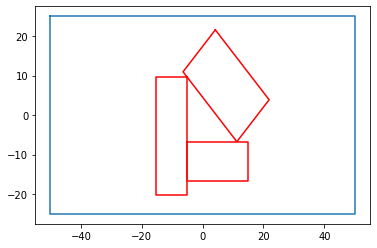

In [15]:
# Display (after running solver)
e.display_environment()

### What's next?

- In terms of OOP and optimization design
  - New shapes for buildings and environments? (Right now, only rectangular)
  - New constraints and objective/performance functions? (Right now, very simplistic)
- What other mutations can be considered?
  - Would it make sense to mutate by rotating the buildings randomly, on top of the centroids moving?
  - Would it make sense to mutate by swapping the position of two buildings, sometimes?
  - Could the current mutation lead to a solver "stuck" with an inefficient solution as the current best candidate? How to detect it and possibly avoid it?
- Can we use a smarter mutation procedure than just moving randomly? 
  - Lots of rejects when randomly mutating, this is a waste of time for the solver.
  - Could we come up with a procedure that tells us an "approximate good" direction in which we could move?
  - E.g., maybe moving the buildings in a few directions, with a small step and compute an approximate gradient for the objective/performance function that we could use to improve our chances of producing a better candidate on each iteration?
- How to decide on a number of iterations?
  - Can we stop early if we feel we have found a good candidate?
  - Can we add more iterations if we detect there is still room for improvement?